## Import des bibliothèques Python

In [3]:
import numpy as np                #pour disposer des tableaux de type array
import matplotlib.pyplot as plt   #pour les graphiques

In [2]:
%matplotlib inline
#pour l'affichage des graphiques dans la page et non pas dans une fenetre pop up

In [4]:
import operator                   #pour utiliser les opérateurs de base sous forme de fonctions

In [5]:
from sympy import *               #pour le calcul formel
init_printing()
t = symbols('t')

In [6]:
def dérivée(exp, t):
    return diff(exp,t)

def simplifier(exp):
    return simplify(exp)

def factoriser(exp):
    return factor(exp)

## Résolution approchée de $f(x)=0$ par balayage, exemple 11 du cours

Soit $f$ la fonction définie sur $\mathbb{R}$ par $f(x)=x^3-6x^2+6$ definie sur $\mathbb{R}$ et dérivable sur $\mathbb{R}$ .

### Question 1  : Calcul de dérivée

In [7]:
#expression de f(x)
fexp = t**3 - 6*t**2 + 6
fexp

In [8]:
#expression de f'(x)
fprimexp = dérivée(fexp, t)
fprimexp

In [9]:
simplifier(fprimexp)

### Questions 2  et 3 Etude des variations de $f$

In [11]:
f = lambdify(t, fexp,"numpy")
fprim = lambdify(t, fprimexp,"numpy")

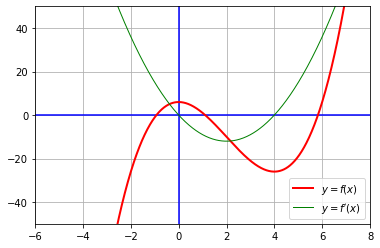

In [16]:
#tracé des  courbes  de f et f'
#Message d'erreur pour f' pour le point d'abscisse 0 (division par 0)
xmin, xmax, ymin, ymax = -6, 8, -50 , 50
plt.axis([xmin, xmax, ymin, ymax])
tx = np.linspace(xmin, xmax, 1001)
ty = f(tx)
tz = fprim(tx)
plt.axhline(color='blue')
plt.axvline(color='blue')
plt.grid(True)
plt.plot(tx, ty, linestyle='-', linewidth=2, color='red', label=r'$y=f(x)$')
plt.plot(tx, tz, linestyle='-', linewidth=1, color='green', label=r"$y=f'(x)$")
plt.legend(loc='lower right')
         

### Question 4 Existence de solutions de l'équation $f(x)=0$

* $f:x \mapsto f(x)=x^3-6x^2+6$ est dérivable donc continue sur $]-\infty;0]$
* $\lim\limits_{x\to -\infty}f(x)=-\infty$ et $f(0)>0$
* $f$ est strictement croissante sur $]-\infty;0]$

D'après un corollaire du théorème des valeurs intermédiaires, l'équation $f(x)=0$ possède donc une unique solution $\alpha$ dans l'intervalle $]-\infty;0]$.

* $f:x \mapsto f(x)=x^3-6x^2+6$ est dérivable donc continue sur $[0;4]$
* $f(0)>0$ et $f(4)<0$
* $f$ est strictement croissante sur $[0;4]$

D'après un corollaire du théorème des valeurs intermédiaires, l'équation $f(x)=0$ possède donc une unique solution $\alpha$ dans l'intervalle $[0;4]$

* $f:x \mapsto f(x)=x^3-6x^2+6$ est dérivable donc continue sur $[4;+\infty[$
*   $f(4)<0$ et $\lim\limits_{x\to +\infty}f(x)=+\infty$
* $f$ est strictement croissante sur $[4;+\infty[$

D'après un corollaire du théorème des valeurs intermédiaires, l'équation $f(x)=0$ possède donc une unique solution $\alpha$ dans l'intervalle $[4;+\infty[$.

## Résolution approchée par balayage

In [17]:
def balayage(g, a, b, pas, k):
    """Retourne un intervalle d'amplitude pas encadrant l'unique solution de g(x)= k
    dans l'intervalle [a,b]"""
    if g(a) < k:
        comparaison = lambda u, v : operator.lt(u,v)
    else:
        comparaison = lambda u, v : operator.gt(u,v)
    x = a
    #en-tete du tableau
    print('|{etape:^16}|{t:^12}|{ft:^12}|'.format(etape='Etape', t='t', ft='g(t)'))
    count = 1
    while comparaison(g(x), k):
        print('|{etape:^16}|{t:^12.6f}|{ft:^12.6f}|'.format(etape=count,t=x, ft=g(x)))
        x += pas
        count += 1
    print('|{etape:^16}|{t:^12.6f}|{ft:^12.6f}|'.format(etape=count,t=x, ft=g(x)))       
    return x - pas, x

In [19]:
balayage(f, 5, 6, 0.1, 0)

|     Etape      |     t      |    g(t)    |
|       1        |  5.000000  | -19.000000 |
|       2        |  5.100000  | -17.409000 |
|       3        |  5.200000  | -15.632000 |
|       4        |  5.300000  | -13.663000 |
|       5        |  5.400000  | -11.496000 |
|       6        |  5.500000  | -9.125000  |
|       7        |  5.600000  | -6.544000  |
|       8        |  5.700000  | -3.747000  |
|       9        |  5.800000  | -0.728000  |
|       10       |  5.900000  |  2.519000  |


In [20]:
balayage(f, 5.8, 5.9, 0.01, 0)

|     Etape      |     t      |    g(t)    |
|       1        |  5.800000  | -0.728000  |
|       2        |  5.810000  | -0.413659  |
|       3        |  5.820000  | -0.097032  |
|       4        |  5.830000  |  0.221887  |


In [21]:
balayage(f, 5.82, 5.83, 0.001, 0)

|     Etape      |     t      |    g(t)    |
|       1        |  5.820000  | -0.097032  |
|       2        |  5.821000  | -0.065243  |
|       3        |  5.822000  | -0.033432  |
|       4        |  5.823000  | -0.001597  |
|       5        |  5.824000  |  0.030260  |
